# Introduction

    Cannabis, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for  medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

    Cannabis is often used for its mental and physical effects, such as a "high" or "stoned" feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.

# Understanding Data

    Are the Species distribuition of our dataset equal?

    The all types of strains have the same rating distribuition?

    Whats the first word in description to each species? 

    Are the Flavor important to the rating ?

    Are the Effect important to the rating? 

    Are some difference in Effects and Flavors related by specie? 
    
    Are the price affect to Type Distribution?

# Librarys and import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import math

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # to plot graphs with gggplot2 style

# Knowning the Data

In [2]:
strains = pd.read_csv('strains_preprocessing.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
total = strains.isnull().sum().sort_values(ascending=False)
percent = (strains.isnull().sum()/strains.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=('Total Percent').split())
missing_data

Total  Percent
Ammonia           0      0.0
Apple             0      0.0
Apricot           0      0.0
Aroused           0      0.0
Berry             0      0.0
Blue              0      0.0
Blueberry         0      0.0
Butter            0      0.0
Cheese            0      0.0
Chemical          0      0.0
Chestnut          0      0.0
Citrus            0      0.0
Coffee            0      0.0
Creative          0      0.0
Description       0      0.0
Diesel            0      0.0
Dry               0      0.0
Earthy            0      0.0
Effects           0      0.0
Effects1          0      0.0
Effects2          0      0.0
Effects3          0      0.0
Effects4          0      0.0
Effects5          0      0.0
Energetic         0      0.0
Euphoric          0      0.0
Flavor            0      0.0
Flavor1           0      0.0
Flavor2           0      0.0
Flavor3           0      0.0
Flowery           0      0.0
Focused           0      0.0
Fruit             0      0.0
Giggly            0      0.0
Grape             0      0.0
Grapefruit        0      0.0
Happy             0      0.0
Honey             0      0.0
Hungry            0      0.0
Lavender          0      0.0
Lemon             0      0.0
Lime              0      0.0
Mango             0      0.0
Menthol           0      0.0
Mint              0      0.0
Minty             0      0.0
None              0      0.0
None.1            0      0.0
Nutty             0      0.0
Orange            0      0.0
Peach             0      0.0
Pear              0      0.0
Pepper            0      0.0
Pine              0      0.0
Pineapple         0      0.0
Price             0      0.0
Pungent           0      0.0
Rating            0      0.0
Relaxed           0      0.0
Rose              0      0.0
Sage              0      0.0
Skunk             0      0.0
Sleepy            0      0.0
Spicy/Herbal      0      0.0
Strain            0      0.0
Strawberry        0      0.0
Sweet             0      0.0
Talkative         0      0.0
Tar               0      0.0
Tea               0      0.0
Tingly            0      0.0
Tobacco           0      0.0
Tree              0      0.0
Tropical          0      0.0
Type              0      0.0
Uplifted          0      0.0
Vanilla           0      0.0
Violet            0      0.0
Woody             0      0.0

In [4]:
strains.head()

Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   

                                         Description  Price  Effects1  \
0  $100 OG is a 50/50 hybrid strain that packs a ...    109  Creative   
1  The ‘98 Aloha White Widow is an especially pot...     31   Relaxed   
2  1024 is a sativa-dominant hybrid bred in Spain...    391  Uplifted   
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...     38    Tingly   
4  Also known as Kosher Tangie, 24k Gold is a 60%...    178     Happy   

    Effects2  Effects3   Effects4   Effects5       Flavor1 Flavor2  \
0  Energetic    Tingly   Euphoric    Relaxed        Earthy   Sweet   
1    Aroused  Creative      Happy  Energetic       Flowery  Violet   
2      Happy   Relaxed  Energetic   Creative  Spicy/Herbal    Sage   
3   Creative    Hungry    Relaxed   Uplifted       Apricot  Citrus   
4    Relaxed  Euphoric   Uplifted  Talkative        Citrus  Earthy   

      Flavor3  Aroused  Creative  Dry  Energetic  Euphoric  Focused  Giggly  \
0      Citrus        0         1    0          1         1        0       0   
1      Diesel        1         1    0          1         0        0       0   
2       Woody        0         1    0          1         0        0       0   
3  Grapefruit        0         1    0          0         0        0       0   
4      Orange        0         0    0          0         1        0       0   

   Happy  Hungry  None  Relaxed  Sleepy  Talkative  Tingly  Uplifted  Ammonia  \
0      0       0     0        1       0          0       1         0        0   
1      1       0     0        1       0          0       0         0        0   
2      1       0     0        1       0          0       0         1        0   
3      0       1     0        1       0          0       1         1        0   
4      1       0     0        1       0          1       0         1        0   

   Apple  Apricot  Berry  Blue  Blueberry  Butter  Cheese  Chemical  Chestnut  \
0      0        0      0     0          0       0       0         0         0   
1      0        0      0     0          0       0       0         0         0   
2      0        0      0     0          0       0       0         0         0   
3      0        1      0     0          0       0       0         0         0   
4      0        0      0     0          0       0       0         0         0   

   Citrus  Coffee  Diesel  Earthy  Flowery  Fruit  Grape  Grapefruit  Honey  \
0       1       0       0       1        0      0      0           0      0   
1       0       0       1       0        1      0      0           0      0   
2       0       0       0       0        0      0      0           0      0   
3       1       0       0       0        0      0      0           1      0   
4       1       0       0       1        0      0      0           0      0   

   Lavender  Lemon  Lime  Mango  Menthol  Mint  Minty  None.1  Nutty  Orange  \
0         0      0     0      0        0     0      0       0      0       0   
1         0      0     0      0        0     0      0       0      0       0   
2         0      0     0      0        0     0      0       0      0       0   
3         0      0     0      0        0     0      0       0      0       0   
4         0      0     0      0        0     0      0       0      0       1   

   Peach  Pear  Pepper  Pine  Pineapple  Pungent  Rose  Sage  Skun

In [5]:
dfDescribe=pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, strains.dtypes[col], 
                               sum(strains[col].isna()),
                               round(100*sum(strains[col].isna())/len(strains[col]),2),
                               strains[col].nunique(),
                               list((strains[col].unique()[:]))]for col in strains.columns])
                                                                  
dfDescribe

dataFeatures dataType  null  nullPct  unique  \
0         Strain   object     0      0.0    2350   
1           Type   object     0      0.0       3   
2         Rating  float64     0      0.0      21   
3        Effects   object     0      0.0    1655   
4         Flavor   object     0      0.0    1293   
5    Description   object     0      0.0    2312   
6          Price    int64     0      0.0     658   
7       Effects1   object     0      0.0      15   
8       Effects2   object     0      0.0      15   
9       Effects3   object     0      0.0      14   
10      Effects4   object     0      0.0      14   
11      Effects5   object     0      0.0      14   
12       Flavor1   object     0      0.0      48   
13       Flavor2   object     0      0.0      48   
14       Flavor3   object     0      0.0      49   
15       Aroused    int64     0      0.0       2   
16      Creative    int64     0      0.0       2   
17           Dry    int64     0      0.0       2   
18     Energetic    int64     0      0.0       2   
19      Euphoric    int64     0      0.0       2   
20       Focused    int64     0      0.0       2   
21        Giggly    int64     0      0.0       2   
22         Happy    int64     0      0.0       2   
23        Hungry    int64     0      0.0       2   
24          None    int64     0      0.0       2   
25       Relaxed    int64     0      0.0       2   
26        Sleepy    int64     0      0.0       2   
27     Talkative    int64     0      0.0       2   
28        Tingly    int64     0      0.0       2   
29      Uplifted    int64     0      0.0       2   
30       Ammonia    int64     0      0.0       2   
31         Apple    int64     0      0.0       2   
32       Apricot    int64     0      0.0       2   
33         Berry    int64     0      0.0       2   
34          Blue    int64     0      0.0       2   
35     Blueberry    int64     0      0.0       2   
36        Butter    int64     0      0.0       2   
37        Cheese    int64     0      0.0       2   
38      Chemical    int64     0      0.0       2   
39      Chestnut    int64     0      0.0       2   
40        Citrus    int64     0      0.0       2   
41        Coffee    int64     0      0.0       2   
42        Diesel    int64     0      0.0       2   
43        Earthy    int64     0      0.0       2   
44       Flowery    int64     0      0.0       2   
45         Fruit    int64     0      0.0       2   
46         Grape    int64     0      0.0       2   
47    Grapefruit    int64     0      0.0       2   
48         Honey    int64     0      0.0       2   
49      Lavender    int64     0      0.0       2   
50         Lemon    int64     0      0.0       2   
51          Lime    int64     0      0.0       2   
52         Mango    int64     0      0.0       2   
53       Menthol    int64     0      0.0       2   
54          Mint    int64     0      0.0       2   
55         Minty    int64     0      0.0       2   
56        None.1    int64     0      0.0       2   
57         Nutty    int64     0      0.0       2   
58        Orange    int64     0      0.0       2   
59         Peach    int64     0      0.0       2   
60          Pear    int64     0      0.0       2   
61        Pepper    int64     0      0.0       2   
62          Pine    int64     0      0.0       2   
63     Pineapple    int64     0      0.0       2   
64       Pungent    int64     0      0.0       2   
65          Rose    int64     0      0.0       2   
66          Sage    int64     0      0.0       2   
67         Skunk    int64     0      0.0       2   
68  Spicy/Herbal    int64     0      0.0       2   
69    Strawberry    int64     0      0.0       2   
70         Sweet    int64     0      0.0       2   
71           Tar    int64     0      0.0       2   
72           Tea    int64     0      0.0       2   
73       Tobacco    int64     0      0.0       2   
74          Tree    int64     0      0.0       2   
75      Tropical    int64     0      0.0       2   


In [6]:
len(strains.columns)

79

# Preprocessing Machine Learning Model

In [7]:
#Importing the auxiliar and preprocessing library
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix, roc_auc_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding



In [8]:
strains["Type"] = pd.factorize(strains["Type"])[0]



X = strains.drop(["Type", 'Strain', 'Effects', 'Flavor', 'Description', 'Flavor1', 'Flavor2', 'Flavor3', 'Effects1', 'Effects2', 'Effects3', 'Effects4', 'Effects5' ],1)
y = strains["Type"]
feature_name = X.columns.tolist()
X = X.astype(np.float64, copy=False)
y = y.astype(np.float64, copy=False)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)

X_train Shape:  (1645, 66)
X_test Shape:  (706, 66)


In [10]:
strains['Type'].value_counts()
# 0 = hybrid
# 1 = sativa
# 2 = indica
# 


0    1212
2     699
1     440
Name: Type, dtype: int64

# GridSearchCV

# GridSearchCV Gradien Boosting

In [ ]:
# from sklearn.model_selection import GridSearchCV

# parameters = {
#                 'min_samples_leaf' : (1,2,3),
#               'n_estimators' : (90,100,110),
#              'min_samples_split' : (2,3,4),
#                'max_depth' : (3,4,5),
#               'learning_rate' : (0.1,0.3,0.5)
#              }
# gbc = GradientBoostingClassifier()
# gbc_model = GridSearchCV(rfc, parameters,scoring = 'accuracy', cv=5)
# gbc_model.fit(X_train, y_train)
#  print(gbc_model.best_estimator_)

# GridSearchCV XGBoost

In [11]:
# param_xgb = {
# #  'n_estimators':[60, 70, 80],
#  'max_depth':[3,4,5],
#  'min_child_weight':[3,4,5],
# #  'colsample_bytree':[ 0.3,0.4,0.5],
# #  'colsample_bylevel':[ 0.3, 0.4, 0.5]
   
# }

In [12]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# xgb = XGBClassifier(n_estimators=80, colsample_bylevel=0.2, colsample_bytree=0.4, max_depth=3, min_child_weight=3, )

# xgb_model = GridSearchCV(estimator = xgb, 
#                         param_grid = param_xgb, 
#                         scoring='accuracy',
# #                         refit = 'recall',
#                         cv=2,
#                         verbose = 1)

# xgb_model.fit(X_train, y_train)

In [13]:
# print("Results of the GridSearchCV of XGB: ")
# print(xgb_model.best_params_)
# print(xgb_model.best_estimator_)
# print(xgb_model.score(X_train, y_train))


# GridSearchCV Random Forest Classifier

In [14]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'class_weight' : ({0:1, 1:2},{0:1, 1:3},{0:1, 1:4}),
#                 'min_samples_leaf' : (2,3,4),
# #              'n_estimators' : (70,80,90),
#              'min_samples_split' : (2,3,4),
# #               'max_depth' : (13,15,18)
#              }
# rfc = RandomForestClassifier(n_estimators=80, random_state=101, max_depth=15, min_samples_split=3,min_samples_leaf=3)
# rfc_model = GridSearchCV(rfc, parameters,scoring = 'accuracy', cv=5)
# rfc_model.fit(X_train, y_train)

In [15]:
# print(rfc_model.best_estimator_)

In [16]:
# rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=15, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=3, min_samples_split=3,
#             min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
#             oob_score=False, random_state=101, verbose=0, warm_start=False)
# rfc.fit(X_train, y_train)

# K Fold 

In [17]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
#     roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    return {
        'report' : report,
        'matthews' : matt,
        'f1' : f1,
#         'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
#     roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    return {
        'report' : report,
        'matthews' : matt,
        'f1' : f1,
#         'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix
    }

def calc_metrics(X_train, y_train, X_test, y_test, model) :
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [18]:
data = strains.drop(["Type", 'Strain', 'Effects', 'Flavor', 'Description', 'Flavor1', 'Flavor2', 'Flavor3', 'Effects1', 'Effects2', 'Effects3', 'Effects4', 'Effects5' ],1)
target = strains["Type"]

In [19]:
len(data)

2351

In [20]:
K = 5 
kf = KFold(n_splits=K, shuffle=True, random_state=42)


# K Fold Gradient Boosting Classifier

In [21]:
train_errors = []
validation_errors = []

for train_index, test_index in kf.split(data, target):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    print(len(X_test), len(X_test) ,(len(X_train) + len(X_test)))
    
    gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, min_samples_split = 2, min_samples_leaf = 1,max_depth = 3)
    
    train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, gbc)
    
    train_errors.append(train_error)
    validation_errors.append(test_error)

471 471 2351
470 470 2351
470 470 2351
470 470 2351
470 470 2351


In [22]:
dfModelEvalgbc =pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Train F1 Score','Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef'], 
                          data=[[train_error['accuracy'], val_error['accuracy'], train_error['f1'] , val_error['f1'], train_error['matthews'], val_error['matthews'] ]for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors)])

dfModelEvalgbc

Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  \
0        0.975000       0.951168        0.963557       0.929206   
1        0.975013       0.957447        0.963833       0.935455   
2        0.976608       0.942553        0.965748       0.915554   
3        0.981393       0.925532        0.972498       0.897047   
4        0.978735       0.951064        0.969209       0.924255   

   Train Matthews Corr Coef  Test Matthews Corr Coef  
0                  0.959116                 0.920230  
1                  0.959292                 0.928625  
2                  0.961678                 0.906542  
3                  0.969370                 0.880654  
4                  0.965253                 0.919420

In [23]:
print('Accuracy train :'  + str(dfModelEvalgbc['Train Accuracy'].mean()))
print('Accuracy test : ' +  str(dfModelEvalgbc['Test Accuracy'].mean()))
print('F1 Score train : ' +  str(dfModelEvalgbc['Train F1 Score'].mean()))
print('F1 Score test : '  + str(dfModelEvalgbc['Test F1 Score'].mean()))
print('Matthews Corr Coef train : ' +  str(dfModelEvalgbc['Train Matthews Corr Coef'].mean()))
print('Matthews Corr Coefe test : '  + str(dfModelEvalgbc['Test Matthews Corr Coef'].mean()))

Accuracy train :0.9773498139287613
Accuracy test : 0.9455526945837287
F1 Score train : 0.9669689334617994
F1 Score test : 0.92030326352154
Matthews Corr Coef train : 0.9629420019739635
Matthews Corr Coefe test : 0.911094260301675


In [24]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report train '+ str(i) + ':')
    print(str(train_error['report']))
    print('\n')

report train 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       0.95      0.92      0.93       354
           2       0.95      0.97      0.96       557

   micro avg       0.97      0.97      0.97      1880
   macro avg       0.97      0.96      0.96      1880
weighted avg       0.98      0.97      0.97      1880



report train 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       0.94      0.92      0.93       350
           2       0.95      0.97      0.96       576

   micro avg       0.98      0.98      0.98      1881
   macro avg       0.97      0.96      0.96      1881
weighted avg       0.97      0.98      0.97      1881



report train 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       0.96      0.92      0.94       354
           2       0.95

In [25]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report test '+ str(i) + ':')
    print(str(val_error['report']))
    print('\n')

report test 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       0.85      0.90      0.87        86
           2       0.93      0.90      0.92       142

   micro avg       0.95      0.95      0.95       471
   macro avg       0.93      0.93      0.93       471
weighted avg       0.95      0.95      0.95       471



report test 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       0.91      0.87      0.89        90
           2       0.91      0.93      0.92       123

   micro avg       0.96      0.96      0.96       470
   macro avg       0.94      0.93      0.94       470
weighted avg       0.96      0.96      0.96       470



report test 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.87      0.80      0.84        86
           2       0.89   

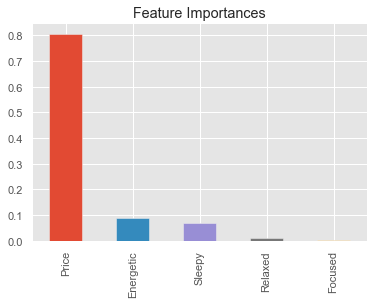

In [83]:
coef1 = pd.Series(gbc.feature_importances_, data.columns).sort_values(ascending = False).head()
coef1.plot(kind='bar', title='Feature Importances')

# K Fold XGBoost

In [27]:
train_errors = []
validation_errors = []

for train_index, test_index in kf.split(data, target):
    data = data.loc[:,~data.columns.duplicated()]

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    print(len(X_train), len(X_test) ,(len(X_train) + len(X_test)))
    
    xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
                       colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_delta_step=0,
                       max_depth=3, min_child_weight=3, missing=None, n_estimators=80,
                       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
                       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                       silent=True, subsample=1)
    
    train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, xgb)
    
    train_errors.append(train_error)
    validation_errors.append(test_error)

1880 471 2351
1881 470 2351
1881 470 2351
1881 470 2351
1881 470 2351


In [28]:
dfModelEvalxgb =pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Train F1 Score','Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef'], 
                          data=[[train_error['accuracy'], val_error['accuracy'], train_error['f1'] , val_error['f1'], train_error['matthews'], val_error['matthews'] ]for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors)])

dfModelEvalxgb

Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  \
0        0.947872       0.932059        0.924219       0.900426   
1        0.946837       0.955319        0.922914       0.932755   
2        0.950027       0.946809        0.927061       0.923018   
3        0.953216       0.923404        0.929685       0.893116   
4        0.948963       0.946809        0.925553       0.917407   

   Train Matthews Corr Coef  Test Matthews Corr Coef  
0                  0.914662                 0.888547  
1                  0.913345                 0.925038  
2                  0.918015                 0.913396  
3                  0.923114                 0.877802  
4                  0.916640                 0.912401

In [29]:
print('Accuracy train :'  + str(dfModelEvalxgb['Train Accuracy'].mean()))
print('Accuracy test : ' +  str(dfModelEvalxgb['Test Accuracy'].mean()))
print('F1 Score train : ' +  str(dfModelEvalxgb['Train F1 Score'].mean()))
print('F1 Score test : '  + str(dfModelEvalxgb['Test F1 Score'].mean()))
print('Matthews Corr Coef train : ' +  str(dfModelEvalxgb['Train Matthews Corr Coef'].mean()))
print('Matthews Corr Coefe test : '  + str(dfModelEvalxgb['Test Matthews Corr Coef'].mean()))

Accuracy train :0.9493830805252979
Accuracy test : 0.940879974702986
F1 Score train : 0.9258861761332378
F1 Score test : 0.9133444382427902
Matthews Corr Coef train : 0.9171553134487871
Matthews Corr Coefe test : 0.9034369370393147


In [30]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report train '+ str(i) + ':')
    print(str(train_error['report']))
    print('\n')

report train 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       0.87      0.85      0.86       354
           2       0.91      0.92      0.91       557

   micro avg       0.95      0.95      0.95      1880
   macro avg       0.93      0.92      0.92      1880
weighted avg       0.95      0.95      0.95      1880



report train 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       0.87      0.84      0.85       350
           2       0.90      0.92      0.91       576

   micro avg       0.95      0.95      0.95      1881
   macro avg       0.92      0.92      0.92      1881
weighted avg       0.95      0.95      0.95      1881



report train 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       0.88      0.86      0.87       354
           2       0.91

In [31]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report test '+ str(i) + ':')
    print(str(val_error['report']))
    print('\n')

report test 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       0.81      0.81      0.81        86
           2       0.89      0.89      0.89       142

   micro avg       0.93      0.93      0.93       471
   macro avg       0.90      0.90      0.90       471
weighted avg       0.93      0.93      0.93       471



report test 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       0.88      0.89      0.88        90
           2       0.92      0.91      0.91       123

   micro avg       0.96      0.96      0.96       470
   macro avg       0.93      0.93      0.93       470
weighted avg       0.96      0.96      0.96       470



report test 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.86      0.85      0.85        86
           2       0.91   

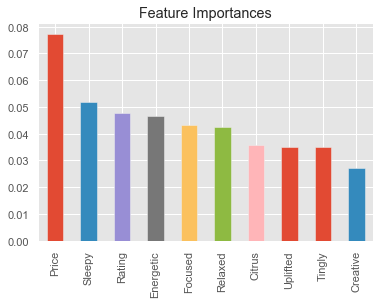

In [32]:
coef1 = pd.Series(xgb.feature_importances_, data.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

# K Fold Random Forest Classifier


In [33]:
train_errors = []
validation_errors = []

for train_index, test_index in kf.split(data, target):
    

    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    print(len(X_train), len(X_test) ,(len(X_train) + len(X_test)))
    
    rfc = RandomForestClassifier(n_estimators=80, random_state=101, max_depth=15, min_samples_split=3,min_samples_leaf=3)
    
    train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, rfc)
    
    train_errors.append(train_error)
    validation_errors.append(test_error)

1880 471 2351
1881 470 2351
1881 470 2351
1881 470 2351
1881 470 2351


In [34]:
dfModelEvalrfc =pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Train F1 Score','Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef'], 
                          data=[[train_error['accuracy'], val_error['accuracy'], train_error['f1'] , val_error['f1'], train_error['matthews'], val_error['matthews'] ]for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors)])

dfModelEvalrfc

Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  \
0        0.963830       0.932059        0.947417       0.899471   
1        0.963849       0.948936        0.947884       0.924209   
2        0.964381       0.934043        0.947699       0.902502   
3        0.967570       0.910638        0.951663       0.874801   
4        0.963849       0.948936        0.947324       0.920693   

   Train Matthews Corr Coef  Test Matthews Corr Coef  
0                  0.940795                 0.888469  
1                  0.941096                 0.914255  
2                  0.941645                 0.892760  
3                  0.946639                 0.857496  
4                  0.941012                 0.915961

In [35]:
print('Accuracy train :'  + str(dfModelEvalrfc['Train Accuracy'].mean()))
print('Accuracy test : ' +  str(dfModelEvalrfc['Test Accuracy'].mean()))
print('F1 Score train : ' +  str(dfModelEvalrfc['Train F1 Score'].mean()))
print('F1 Score test : '  + str(dfModelEvalrfc['Test F1 Score'].mean()))
print('Matthews Corr Coef train : ' +  str(dfModelEvalrfc['Train Matthews Corr Coef'].mean()))
print('Matthews Corr Coefe test : '  + str(dfModelEvalrfc['Test Matthews Corr Coef'].mean()))

Accuracy train :0.964695782008212
Accuracy test : 0.9349225278944754
F1 Score train : 0.9483975409148583
F1 Score test : 0.9043350197931131
Matthews Corr Coef train : 0.9422373399073969
Matthews Corr Coefe test : 0.8937884080711044


In [36]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report train '+ str(i) + ':')
    print(str(train_error['report']))
    print('\n')

report train 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       969
           1       0.91      0.89      0.90       354
           2       0.93      0.95      0.94       557

   micro avg       0.96      0.96      0.96      1880
   macro avg       0.95      0.95      0.95      1880
weighted avg       0.96      0.96      0.96      1880



report train 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       0.91      0.90      0.90       350
           2       0.94      0.94      0.94       576

   micro avg       0.96      0.96      0.96      1881
   macro avg       0.95      0.95      0.95      1881
weighted avg       0.96      0.96      0.96      1881



report train 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       975
           1       0.93      0.88      0.90       354
           2       0.92

In [37]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report test '+ str(i) + ':')
    print(str(val_error['report']))
    print('\n')

report test 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       0.83      0.79      0.81        86
           2       0.88      0.90      0.89       142

   micro avg       0.93      0.93      0.93       471
   macro avg       0.90      0.90      0.90       471
weighted avg       0.93      0.93      0.93       471



report test 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       0.87      0.88      0.87        90
           2       0.91      0.89      0.90       123

   micro avg       0.95      0.95      0.95       470
   macro avg       0.92      0.92      0.92       470
weighted avg       0.95      0.95      0.95       470



report test 3:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.86      0.77      0.81        86
           2       0.87   

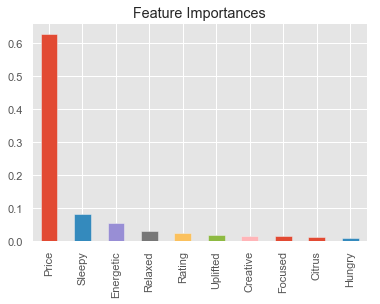

In [38]:
coef1 = pd.Series(rfc.feature_importances_, data.columns).sort_values(ascending = False).head(10)
coef1.plot(kind='bar', title='Feature Importances')

# K Fold Logistic Regression

In [39]:
train_errors = []
validation_errors = []

for train_index, test_index in kf.split(data, target):


    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    print(len(X_train), len(X_test) ,(len(X_train) + len(X_test)))
    
    logreg = LogisticRegression()
    
    train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, logreg)
    
    train_errors.append(train_error)
    validation_errors.append(test_error)

1880 471 2351
1881 470 2351
1881 470 2351
1881 470 2351
1881 470 2351


In [40]:
dfModelEvallogreg =pd.DataFrame(columns=['Train Accuracy', 'Test Accuracy', 'Train F1 Score','Test F1 Score', 'Train Matthews Corr Coef', 'Test Matthews Corr Coef'], 
                          data=[[train_error['accuracy'], val_error['accuracy'], train_error['f1'] , val_error['f1'], train_error['matthews'], val_error['matthews'] ]for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors)])

dfModelEvallogreg

Train Accuracy  Test Accuracy  Train F1 Score  Test F1 Score  \
0        0.930319       0.921444        0.906306       0.897003   
1        0.926635       0.931915        0.902658       0.907475   
2        0.934609       0.914894        0.912442       0.888848   
3        0.936204       0.902128        0.915365       0.869513   
4        0.928230       0.919149        0.904830       0.887955   

   Train Matthews Corr Coef  Test Matthews Corr Coef  
0                  0.885968                 0.872500  
1                  0.880319                 0.886052  
2                  0.892843                 0.861029  
3                  0.894932                 0.843609  
4                  0.882491                 0.866285

In [41]:
print('Accuracy train :'  + str(dfModelEvallogreg['Train Accuracy'].mean()))
print('Accuracy test : ' +  str(dfModelEvallogreg['Test Accuracy'].mean()))
print('F1 Score train : ' +  str(dfModelEvallogreg['Train F1 Score'].mean()))
print('F1 Score test : '  + str(dfModelEvallogreg['Test F1 Score'].mean()))
print('Matthews Corr Coef train : ' +  str(dfModelEvallogreg['Train Matthews Corr Coef'].mean()))
print('Matthews Corr Coefe test : '  + str(dfModelEvallogreg['Test Matthews Corr Coef'].mean()))

Accuracy train :0.9311993959754318
Accuracy test : 0.9179057686226679
F1 Score train : 0.9083202512176582
F1 Score test : 0.8901589415586765
Matthews Corr Coef train : 0.8873105988424923
Matthews Corr Coefe test : 0.8658951540506511


In [42]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report train '+ str(i) + ':')
    print(str(train_error['report']))
    print('\n')

report train 1:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.84      0.86      0.85       354
           2       0.89      0.87      0.88       557

   micro avg       0.93      0.93      0.93      1880
   macro avg       0.91      0.91      0.91      1880
weighted avg       0.93      0.93      0.93      1880



report train 2:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       955
           1       0.84      0.84      0.84       350
           2       0.89      0.87      0.88       576

   micro avg       0.93      0.93      0.93      1881
   macro avg       0.90      0.90      0.90      1881
weighted avg       0.93      0.93      0.93      1881



report train 3:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       975
           1       0.85      0.87      0.86       354
           2       0.90

In [43]:
for i, train_error, val_error in zip(range(1,6,1), train_errors, validation_errors):
    print('report test '+ str(i) + ':')
    print(str(val_error['report']))
    print('\n')

report test 1:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       243
           1       0.79      0.90      0.84        86
           2       0.92      0.82      0.87       142

   micro avg       0.92      0.92      0.92       471
   macro avg       0.90      0.90      0.90       471
weighted avg       0.92      0.92      0.92       471



report test 2:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       257
           1       0.86      0.88      0.87        90
           2       0.87      0.87      0.87       123

   micro avg       0.93      0.93      0.93       470
   macro avg       0.91      0.91      0.91       470
weighted avg       0.93      0.93      0.93       470



report test 3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       237
           1       0.83      0.81      0.82        86
           2       0.88   

# Model Deploy

In [44]:
import pickle
filename = 'rfc_model.sav';
pickle.dump(rfc, open(filename, 'wb'))

In [45]:
rfc.predict([data.loc[2,:]])

array([1], dtype=int64)

In [46]:
import pickle
filename = 'xgb_strains.sav';
pickle.dump(xgb, open(filename, 'wb'))

In [47]:
import pickle
filename = 'logreg_strains.sav';
pickle.dump(logreg, open(filename, 'wb'))

In [48]:
import pickle
filename = 'gbc_strains.sav';
pickle.dump(gbc, open(filename, 'wb'))

In [49]:
strains.head()

Strain  Type  Rating                                     Effects  \
0          100-Og     0     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow     0     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024     1     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs     0     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold     0     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   

                                         Description  Price  Effects1  \
0  $100 OG is a 50/50 hybrid strain that packs a ...    109  Creative   
1  The ‘98 Aloha White Widow is an especially pot...     31   Relaxed   
2  1024 is a sativa-dominant hybrid bred in Spain...    391  Uplifted   
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...     38    Tingly   
4  Also known as Kosher Tangie, 24k Gold is a 60%...    178     Happy   

    Effects2  Effects3   Effects4   Effects5       Flavor1 Flavor2  \
0  Energetic    Tingly   Euphoric    Relaxed        Earthy   Sweet   
1    Aroused  Creative      Happy  Energetic       Flowery  Violet   
2      Happy   Relaxed  Energetic   Creative  Spicy/Herbal    Sage   
3   Creative    Hungry    Relaxed   Uplifted       Apricot  Citrus   
4    Relaxed  Euphoric   Uplifted  Talkative        Citrus  Earthy   

      Flavor3  Aroused  Creative  Dry  Energetic  Euphoric  Focused  Giggly  \
0      Citrus        0         1    0          1         1        0       0   
1      Diesel        1         1    0          1         0        0       0   
2       Woody        0         1    0          1         0        0       0   
3  Grapefruit        0         1    0          0         0        0       0   
4      Orange        0         0    0          0         1        0       0   

   Happy  Hungry  None  Relaxed  Sleepy  Talkative  Tingly  Uplifted  Ammonia  \
0      0       0     0        1       0          0       1         0        0   
1      1       0     0        1       0          0       0         0        0   
2      1       0     0        1       0          0       0         1        0   
3      0       1     0        1       0          0       1         1        0   
4      1       0     0        1       0          1       0         1        0   

   Apple  Apricot  Berry  Blue  Blueberry  Butter  Cheese  Chemical  Chestnut  \
0      0        0      0     0          0       0       0         0         0   
1      0        0      0     0          0       0       0         0         0   
2      0        0      0     0          0       0       0         0         0   
3      0        1      0     0          0       0       0         0         0   
4      0        0      0     0          0       0       0         0         0   

   Citrus  Coffee  Diesel  Earthy  Flowery  Fruit  Grape  Grapefruit  Honey  \
0       1       0       0       1        0      0      0           0      0   
1       0       0       1       0        1      0      0           0      0   
2       0       0       0       0        0      0      0           0      0   
3       1       0       0       0        0      0      0           1      0   
4       1       0       0       1        0      0      0           0      0   

   Lavender  Lemon  Lime  Mango  Menthol  Mint  Minty  None.1  Nutty  Orange  \
0         0      0     0      0        0     0      0       0      0       0   
1         0      0     0      0        0     0      0       0      0       0   
2         0      0     0      0        0     0      0       0      0       0   
3         0      0     0      0        0     0      0       0      0       0   
4         0      0     0      0        0     0      0       0      0       1   

   Peach  Pear  Pepper  Pine  Pineapple  Pungent  Rose  Sage  Skunk  \
0      

In [80]:
len(strains.columns)

79

In [50]:
strains.to_csv('strains_deploy.csv', index=False)

In [51]:
# data.columns

In [52]:
# X_train.head().columns

In [53]:
# strains.head()

In [54]:



# dictioEffects['Effect1']=1
# dictioEffects['Effect2']=1
# dictioEffects['Effect3']=1
# dictioEffects['Effect4']=1
# dictioEffects['Effect5']=1
# dictioFlavor['Flavor1']=1
# dictioFlavor['Flavor2']=1
# dictioFlavor['Flavor3']=1

In [55]:
# print(dictioEffects)

In [56]:
# Effects1 = 'Aroused'

In [57]:
# Effects1='Aroused'
# Effects2='Creative'
# Effects3='Dry'
# Effects4='Energetic'
# Effects5='Focused'
# Flavour1='Citrus'
# Flavour2='Woody'
# Flavour3='Diesel'

In [58]:
# def update_output (Effects1,Effects2,Effects3,Effects4,Effects5,Flavor1,Flavor2,Flavor3) :
#     dictio={
#         'Aroused':0,
#         'Creative':0,
#         'Dry' : 0,
#         'Energetic' : 0,
#         'Euphoric' : 0,
#         'Focused' : 0,
#         'Giggly' : 0,
#         'Happy' : 0,
#         'Hungry' : 0,
#         'None' : 0,
#         'Relaxed' : 0,
#         'Sleepy' : 0,
#         'Talkative' : 0,
#         'Tingly' : 0,
#         'Uplifted' : 0,
#         'Ammonia':0,
#         'Apple':0,
#         'Apricot':0,
#         'Berry':0,
#         'Blue':0,
#         'Blueberry':0,
#         'Butter':0,
#         'Cheese':0,
#         'Chemical':0,
#         'Chestnut':0,
#         'Citrus':0,
#         'Coffee':0,
#         'Diesel':0,
#         'Earthy':0,
#         'Flowery':0,
#         'Fruit':0,
#         'Grape':0,
#         'Grapefruit':0,
#         'Honey':0,
#         'Lavender':0,
#         'Lemon':0,
#         'Lime':0,
#         'Mango':0,
#         'Menthol':0,
#         'Mint':0,
#         'Minty':0,
#         'None.1':0,
#         'Nutty':0,
#         'Orange':0,
#         'Peach':0,
#         'Pear':0,
#         'Pepper':0,
#         'Pine':0,
#         'Pineapple':0,
#         'Pungent':0,
#         'Rose':0,
#         'Sage':0,
#         'Skunk':0,
#         'Spicy/Herbal':0,
#         'Strawberry':0,
#         'Sweet':0,
#         'Tar':0,
#         'Tea':0,
#         'Tobacco':0,
#         'Tree':0,
#         'Tropical':0,
#         'Vanilla':0,
#         'Violet':0,
#         'Woody':0
#     }

#     dictio[Effects1]=1
#     dictio[Effects2]=1
#     dictio[Effects3]=1
#     dictio[Effects4]=1
#     dictio[Effects5]=1
#     dictio[Flavor1]=1
#     dictio[Flavor2]=1
#     dictio[Flavor3]=1
#     return dictio

In [59]:
# len(X_train.columns)

In [60]:
# x = update_output(Effects1,Effects2,Effects3,Effects4,Effects5,Flavour1,Flavour2,Flavour3)

In [61]:
# x

In [62]:
# isi = [4, 80]
# for i in x.values():
#     isi.append(i)

In [63]:
# rfc.predict([isi])

In [64]:
# X_train.head()

In [65]:
# data

In [66]:
# data.iloc[:,1:5]

In [67]:
# predik = rfc.predict_proba(data)

In [68]:
# predik[0]

In [69]:
# rfc.predict([data.loc[2,:]])

In [70]:
# data.loc[2,:]    

In [71]:
# xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
#        colsample_bytree=0.4, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=3, min_child_weight=3, missing=None, n_estimators=80,
#        n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)
# xgb.fit(X_train, y_train)

In [72]:
# X_test.iloc[0,:]

In [73]:
# xgb.predict(data.iloc[[0],:])

In [74]:
# len(X_train.columns)

In [75]:
# len(data.columns)

In [76]:
# data.iloc[[0],:]

In [77]:
# pd.DataFrame(data.iloc[0,:]).T